# Notes on Price action: Keys levels ( support and Resistance)


Overview


- This tutorial demonstrates how to identify strong support and resistance levels in trading using Python. Instead of detecting all levels, the focus is on identifying key levels where the price is likely to bounce rather than break through. The detection is based on historical price data by identifying pivot candles and assigning strength scores to these levels.
---
## **Key Concepts**

1. **Support and Resistance (S&R) Levels**:
   - **Support**: A price level where demand is strong enough to prevent the price from falling further.
   - **Resistance**: A price level where selling pressure prevents the price from rising further.

2. **Pivot Candles (Fractals)**:
   - **Pivot High**: A candle with a high price greater than neighboring candles (indicating potential resistance).
   - **Pivot Low**: A candle with a low price lower than neighboring candles (indicating potential support).

3. **Strength Score**:
   - The number of times the price touches or bounces off a level determines the **strength** of that level.

4. **Zone Width**:
   - Instead of exact price levels, support and resistance are treated as **zones** within a range of prices (bin width).

---

## **Step-by-Step Explanation**

### **1. Loading the Historical Data**
- **Data Source**: Historical candlestick data (e.g., EUR/USD hourly data from 2020 to 2023).
- **CSV Data Columns**:
  - **Time**: Timestamp of the candlestick.
  - **Open, High, Low, Close (OHLC)**: Prices.
  - **Volume**: Number of trades or contracts.

**Data Preprocessing**:
- Filter out rows with zero volume (weekends, holidays).
- Reset the index and handle missing values.

---

### **2. Pivot Candle Detection**

**`pivot_id(df, index, n1, n2)`**:
- Function to detect if a given candle at `index` is a **pivot high** or **pivot low**.
- **n1 (left neighbors)**: Number of candles to the left for comparison.
- **n2 (right neighbors)**: Number of candles to the right for comparison.

**Return Values**:
- `2`: **Pivot High** (potential resistance).
- `1`: **Pivot Low** (potential support).
- `0`: No pivot (not significant).

---

### **3. Visualizing Pivot Points**

- A new column `pivot` is added to the DataFrame to store the results.
- Pivot points are plotted on the candlestick chart:
  - **Purple points above**: Pivot highs.
  - **Purple points below**: Pivot lows.

---

### **4. Strength Score for S&R Levels**

To assign a **strength score** to support and resistance levels:
1. Count the number of times the price touches the level.
2. Define a **bin width** (range around the level) to create **zones**.
3. Store pivot highs and lows separately:
   - `high_values`: Prices at pivot highs.
   - `low_values`: Prices at pivot lows.

---

### **5. Histogram of S&R Levels**

A histogram is used to visualize the most frequently touched zones:
- **X-axis**: Price levels (zones).
- **Y-axis**: Number of touches (bounces).
- `bin_width`: Defines the precision of the zones (smaller values = more precise zones).

**Interpretation**:
- Tall bars indicate **strong levels** (price bounced off frequently).
- Short bars indicate **weak levels** (price touched less frequently).

---

In [2]:
import pandas as pd


In [ ]:

df = pd.read_csv(r"C:\Users\derne\OneDrive - The Pennsylvania State University\Programming\Extra\algobot\notes\files\EURUSD_Candlestick_1_Hour_BID_04.05.2003-15.04.2023.csv")
#r"C:\...... to escape the special characters
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
#Check if NA values are in data
df=df[df['volume']!=0] #drop rows with 0 volume, for non trading days
df.reset_index(drop=True, inplace=True)
df.isna().sum() #Check if NA values are in data
df.head(10) 

,time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12284,1.12338,1.12242,1.12305,2.905910e+07
1,04.05.2003 22:00:00.000,1.12274,1.12302,1.12226,1.12241,2.609180e+07
2,04.05.2003 23:00:00.000,1.12235,1.12235,1.12160,1.12169,2.924090e+07
3,05.05.2003 00:00:00.000,1.12161,1.12314,1.12154,1.12258,2.991480e+07
4,05.05.2003 01:00:00.000,1.12232,1.12262,1.12099,1.12140,2.837070e+07
5,05.05.2003 02:00:00.000,1.12141,1.12211,1.12085,1.12152,2.986770e+07
6,05.05.2003 03:00:00.000,1.12123,1.12179,1.12049,1.12162,2.725680e+07
7,05.05.2003 04:00:00.000,1.12098,1.12176,1.12079,1.12122,2.827890e+07
8,05.05.2003 05:00:00.000,1.12129,1.12222,1.12091,1.12143,2.676490e+07
9,05.05.2003 06:00:00.000,1.12128,1.12241,1.12066,1.12088,2.995660e+07


In [12]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    
    if l-n1 < 0 or l+n2 >= len(df1):# will need to at least have n1 candles before and n2 candles after
        return 0
    
    pividlow= 1 # pivot id low
    pividhigh=1 # pivot id high
    for i in range(l-n1, l+n2+1): # look at n1 candles before and n2 candles after
        if(df1.low[l]>df1.low[i]): # if low of candle l is higher than low of candle i
            pividlow=0              # set pivot id low to 0, false
        if(df1.high[l]<df1.high[i]): # if high of candle l is lower than high of candle i
            pividhigh=0             # set pivot id high to 0, false
    if pividlow and pividhigh: # if pivot id low and pivot id high are true
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0
    
df['pivot'] = df.apply(lambda x: pivotid(df, x.name,10,10), axis=1)

In [11]:
df

,time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12284,1.12338,1.12242,1.12305,2.905910e+07
1,04.05.2003 22:00:00.000,1.12274,1.12302,1.12226,1.12241,2.609180e+07
2,04.05.2003 23:00:00.000,1.12235,1.12235,1.12160,1.12169,2.924090e+07
3,05.05.2003 00:00:00.000,1.12161,1.12314,1.12154,1.12258,2.991480e+07
4,05.05.2003 01:00:00.000,1.12232,1.12262,1.12099,1.12140,2.837070e+07
...,...,...,...,...,...,...
123836,14.04.2023 16:00:00.000,1.09789,1.09851,1.09722,1.09775,1.429995e+07
123837,14.04.2023 17:00:00.000,1.09775,1.09901,1.09752,1.09871,9.740260e+06
123838,14.04.2023 18:00:00.000,1.09871,1.09989,1.09871,1.09988,9.199190e+06
123839,14.04.2023 19:00:00.000,1.09987,1.09992,1.09921,1.09964,4.669030e+06


In [13]:
import numpy as np

# create a new column 'pointpos', which is the position of the pivot
def pointpos(x):
    if x['pivot']==1:
        return x['low']-1e-3 #1e-3 is a small number, to avoid rounding errors, to make sure the point is exactly at the pivot, but not interefering with the true value
    elif x['pivot']==2:
        return x['high']+1e-3 #
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [ ]:
# making visualizations

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime



dfpl = df[-300:-1] # take the last 300 candles
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'],
                increasing_line_color= 'green', 
                decreasing_line_color= 'red')])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black')

fig.show()

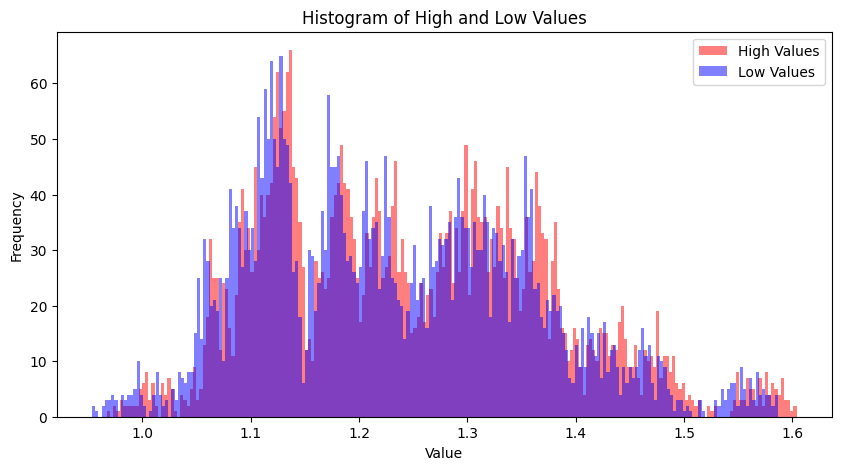

In [18]:
import matplotlib.pyplot as plt

dfkeys = df[:]

# Filter the dataframe based on the pivot column
high_values = dfkeys[dfkeys['pivot'] == 2]['high']
low_values = dfkeys[dfkeys['pivot'] == 1]['low']

# Define the bin width
bin_width = 0.003  # Change this value as needed

# Calculate the number of bins
bins = int((high_values.max() - low_values.min()) / bin_width)

# Create the histograms
plt.figure(figsize=(10, 5))
plt.hist(high_values, bins=bins, alpha=0.5, label='High Values', color='red')
plt.hist(low_values, bins=bins, alpha=0.5, label='Low Values', color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of High and Low Values')
plt.legend()

## **Results Interpretation**

### **Strong Zones:**
- Zones with multiple bounces (e.g., 6–10 times) indicate strong support or resistance.
- **Example**: A level where the price bounced **10+ times** acts as a significant reversal point.

### **Weak Zones:**
- Levels with 1–2 bounces may not hold during a strong trend.

### **Dual Role Levels:**
- Some levels act as both support and resistance over time.

---

## **Customization and Extensions**

### **Zone Width (`bin_width`):**
- **Smaller values** provide more precision but may introduce noise.
- **Larger values** give smoother zones but may lose fine details.

### **Time Frame Selection:**
- **Lower time frames** (e.g., 15 min) provide more granular data but can be noisy.
- **Higher time frames** (e.g., daily) provide stronger, broader levels.

### **Indicator Combination:**
- Combine with **moving averages**, **RSI**, or **MACD** to improve signal reliability.

---

## **Key Takeaways**
- **Support and resistance levels** are crucial in technical analysis, acting as key price reversal zones.
- **Pivot detection** provides a systematic approach to identifying significant levels.
- Treating S&R as **zones** rather than exact levels improves the robustness of the analysis.
- This approach can be **automated** for daily trading alerts.
